# End-to-end Machine Learning project

The best way to learning any programming language or new concept is to do hands-on on that. Let's start with buidling machine learning model

## Problem Statement




## Dataset

The dataset contains the hourly rental bike demand data.

It is located at `/cxldata/datasets/bootml/Bikes_Data_1`

# Get the data

In [1]:
import pandas as pd
import os

DATASET_PATH = '/cxldata/datasets/bootml/Bikes_Data_1'
def load_dataset_data(dataset_path=DATASET_PATH): 
    csv_path = os.path.join(dataset_path, "bikes.csv") 
    return pd.read_csv(csv_path)

In [2]:
Bikes_Data = load_dataset_data()
Bikes_Data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The relevant attributes in bikes.csv are : 

season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, cnt, 



## Let's dop the irrelevant fields from our file


In [3]:
for x in ['instant','dteday','casual','registered', ]:
    Bikes_Data = Bikes_Data.drop(x,axis=1)

In [4]:
Bikes_Data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


## Know your data

In [5]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

Bikes_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [6]:
# Let's look at the numerical fields.
# The describe() method shows a summary of the numerical attributes

Bikes_Data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


The count, mean, min and max rows are self-explanatory.

**std** rows shows the standard deviation (which measures how dispersed the values are)

** 25%, 50%, 75% ** shows the corresponding percentiles

** Points to Note**

1. ** 25th percentile is called 1st quartile ** 
2. ** 50th percentile is called median ** 
3. ** 75th percentile is called 3rd quartile ** 

## Plot histogram

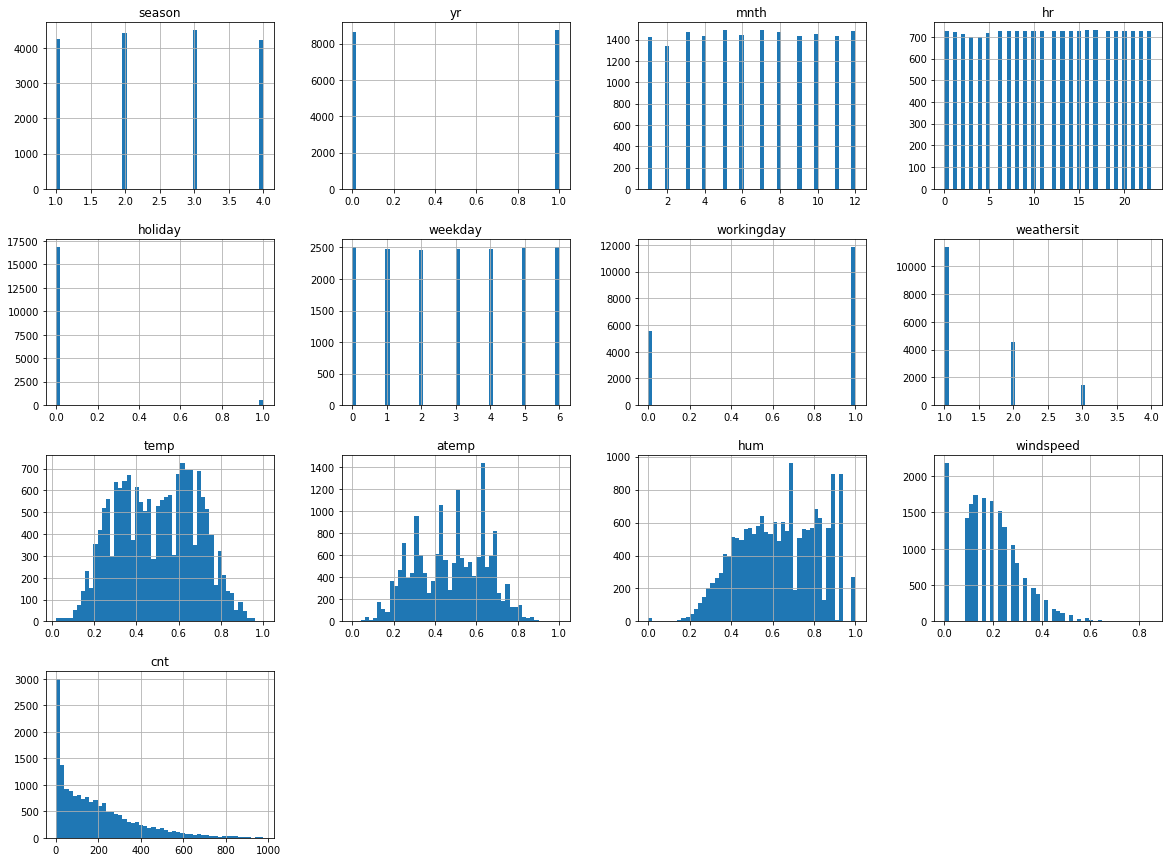

In [7]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

%matplotlib inline
import matplotlib.pyplot as plt
Bikes_Data.hist(bins=50, figsize=(20,15))
plt.show()

## Split dataset into test and training set

In [8]:
# To make this notebook's output identical at every run

import numpy as np

np.random.seed(42)

In [9]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Bikes_Data, test_size=0.2, random_state=42)

print ("Length of train set is", len(train_set))
print ("Length of test set is", len(test_set))


Length of train set is 13903
Length of test set is 3476


In [10]:
Bikes_Data = train_set.copy()
Bikes_Data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
335,1,0,1,11,0,6,0,1,0.20,0.1970,0.55,0.2239,72
7035,4,0,10,18,0,2,1,1,0.52,0.5000,0.42,0.1045,518
8051,4,0,12,3,0,3,1,3,0.46,0.4545,1.00,0.2239,3
2133,2,0,4,18,0,0,0,2,0.46,0.4545,0.31,0.0000,172
8485,1,0,12,6,0,0,0,1,0.20,0.2273,0.75,0.1045,1


# Discover and visualize the data to gain insights

<AxesSubplot:xlabel='season', ylabel='season'>

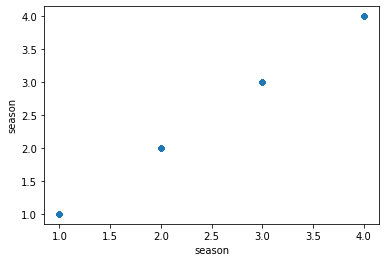

In [11]:
Bikes_Data.plot(kind="scatter", x="season", y="season", alpha=0.1)

In [12]:
Bikes_Data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,2.509243,0.502050,6.552974,11.557146,0.028699,2.998202,0.679566,1.426023,0.497396,0.476183,0.627011,0.189822,190.577070
std,1.106817,0.500014,3.436925,6.911927,0.166965,2.011350,0.466660,0.638842,0.193017,0.172308,0.192801,0.122293,182.220507
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,39.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,143.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,976.000000


# Prepare the data for Machine Learning algorithms

In [13]:
# Let’s revert to a clean training set

x = 0
for x in ['cnt', ]:
    Bikes_Data = train_set.drop(x, axis=1) # drop label for training set
    Bikes_Data_labels = train_set[x].copy()

# Note drop() creates a copy of the data and does not affect train_set

In [14]:
# Let’s experiment with sample dataset for data cleaning

sample_incomplete_rows = Bikes_Data[Bikes_Data.isnull().any(axis=1)].head()
sample_incomplete_rows

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [15]:
# Let's use Scikit-Learn Imputer class to fill missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [17]:
Bikes_Data_num = Bikes_Data

## Feature scaling

In [18]:
# Use Scikit-Learn standard_scaling
num_variables_standardization = []
for x in ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed', ]:
    num_variables_standardization.append(x)
Bikes_Data_num_standardization = Bikes_Data_num[num_variables_standardization]
Bikes_Data_num_standardization.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
335,1,0,1,11,0,6,0,1,0.20,0.1970,0.55,0.2239
7035,4,0,10,18,0,2,1,1,0.52,0.5000,0.42,0.1045
8051,4,0,12,3,0,3,1,3,0.46,0.4545,1.00,0.2239
2133,2,0,4,18,0,0,0,2,0.46,0.4545,0.31,0.0000
8485,1,0,12,6,0,0,0,1,0.20,0.2273,0.75,0.1045


In [19]:
# Building a pipeline for preprocessing the numerical attributes for StandardScaler:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attribs_standard = list(Bikes_Data_num_standardization)
num_pipeline_standard = Pipeline([
    ('selector', DataFrameSelector(num_attribs_standard)),
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler()),
])


In [20]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline_standard", num_pipeline_standard),
])


In [21]:
Bikes_Data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
335,1,0,1,11,0,6,0,1,0.20,0.1970,0.55,0.2239
7035,4,0,10,18,0,2,1,1,0.52,0.5000,0.42,0.1045
8051,4,0,12,3,0,3,1,3,0.46,0.4545,1.00,0.2239
2133,2,0,4,18,0,0,0,2,0.46,0.4545,0.31,0.0000
8485,1,0,12,6,0,0,0,1,0.20,0.2273,0.75,0.1045


In [22]:
Bikes_Data_prepared = full_pipeline.fit_transform(Bikes_Data)
print(Bikes_Data_prepared[0])
print(Bikes_Data_prepared[1])
print(Bikes_Data_prepared[2])

[-1.36363715 -1.00410827 -1.61573901 -0.08060936 -0.17189183  1.49248305
 -1.45628403 -0.66689219 -1.54083688 -1.62031134 -0.3994488   0.27866867]
[ 1.34693531 -1.00410827  1.00297496  0.93216926 -0.17189183 -0.49630229
  0.68667923 -0.66689219  0.1171121   0.13822833 -1.07374273 -0.69771358]
[ 1.34693531e+00 -1.00410827e+00  1.58491140e+00 -1.23807063e+00
 -1.71891829e-01  8.94045052e-04  6.86679231e-01  2.46388686e+00
 -1.93753334e-01 -1.25842810e-01  1.93464557e+00  2.78668674e-01]


In [23]:
Bikes_Data_prepared.shape

(13903, 12)

# Select and train a model 

In [24]:
# Function to display scores of our alogorithms for cross-validation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [25]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Bikes_Data_prepared, Bikes_Data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

Bikes_Data_predictions = lin_reg.predict(Bikes_Data_prepared)
lin_mse = mean_squared_error(Bikes_Data_labels, Bikes_Data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

142.45226586527895

In [27]:
# K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, Bikes_Data_prepared, Bikes_Data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [141.6739931  136.9332798  146.6355158  139.95070903 139.63168008
 140.51019479 147.12052253 146.83020223 147.97899702 137.75358134]
Mean: 142.50186756941565
Standard deviation: 4.00132932767643


In [28]:
# Train a model using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(Bikes_Data_prepared, Bikes_Data_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [29]:
# Calculate RMSE in Decision Tree model
from sklearn.metrics import mean_squared_error

Bikes_Data_predictions = tree_reg.predict(Bikes_Data_prepared)
tree_mse = mean_squared_error(Bikes_Data_labels, Bikes_Data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5989453436724405

In [30]:
# K-fold Cross Validation for Decision Tree Model
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, Bikes_Data_prepared, Bikes_Data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [31]:
display_scores(tree_rmse_scores)

Scores: [62.85280438 62.25935989 61.7399232  61.75335018 60.30418695 55.54901264
 59.58026446 58.9256665  58.3819383  63.45285028]
Mean: 60.47993567869496
Standard deviation: 2.2981704508600087


In [32]:
# Train a model using Random Forests

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(Bikes_Data_prepared, Bikes_Data_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [33]:
# Calculate RMSE in Random Forest model
from sklearn.metrics import mean_squared_error

Bikes_Data_predictions = forest_reg.predict(Bikes_Data_prepared)
forest_mse = mean_squared_error(Bikes_Data_labels, Bikes_Data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

15.983715666257496

In [34]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, Bikes_Data_prepared, Bikes_Data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [40.94942741 44.63567762 45.55438887 43.94086678 43.13076565 41.73330638
 43.26367304 43.97118607 41.54451154 46.59715196]
Mean: 43.532095532879495
Standard deviation: 1.7073796475529766


In [35]:
# Total attributes

attributes = num_attribs_standard

## Fine-tune the Model

In [36]:
# GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30], 'max_features': [6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [20, 35], 'max_features': [7, 9]},
]

algo = RandomForestRegressor(random_state=42)
# train across 10 folds
grid_search = GridSearchCV(algo, param_grid, cv=10,
                           scoring='neg_mean_squared_error')
grid_search.fit(Bikes_Data_prepared, Bikes_Data_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [37]:
# The best hyperparameter combinations

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [38]:
# Get the best estimator

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
# Let's look at the score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48.632778328460276 {'max_features': 6, 'n_estimators': 10}
45.349934778537204 {'max_features': 6, 'n_estimators': 30}
45.30642460321751 {'max_features': 8, 'n_estimators': 10}
42.82742516556323 {'max_features': 8, 'n_estimators': 30}
43.35990205927138 {'bootstrap': False, 'max_features': 7, 'n_estimators': 20}
42.925159614870566 {'bootstrap': False, 'max_features': 7, 'n_estimators': 35}
44.58544258140076 {'bootstrap': False, 'max_features': 9, 'n_estimators': 20}
44.450880139488554 {'bootstrap': False, 'max_features': 9, 'n_estimators': 35}


### Analyze the Best Models and Their Errors

In [40]:
# See the importance score of each attribute in GridSearchCV

feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5526058278591502, 'hr'),
 (0.0872528505124923, 'atemp'),
 (0.07900574460628927, 'yr'),
 (0.0786174326477366, 'temp'),
 (0.06237001110555888, 'workingday'),
 (0.03964924707305536, 'hum'),
 (0.02693241275950374, 'weekday'),
 (0.02098265297263658, 'season'),
 (0.01984803381945026, 'mnth'),
 (0.01712327916768152, 'weathersit'),
 (0.01302483845939972, 'windspeed'),
 (0.002587669017045558, 'holiday')]

In [41]:
# Evaluate model on the Test Set

final_model = grid_search.best_estimator_

x = 0
for x in ['cnt', ]:
    X_test = test_set.drop(x, axis=1)
    y_test = test_set[x].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [42]:
final_rmse

41.13326718948123

Congratulations! You already know quite a lot about Machine Learning. :)